In [801]:
import requests
from IPython.core.display import HTML

In [802]:
import filtering_util
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Filtering gaze data
This exercise introduces different techniques for processing and analyzing gaze data using filtering. In particular the exercise removing noise and identifying fixations and saccades in the signal. A _fixation_ is defined as an instance with little or no eye movement. A _saccade_ is an eye movement between two fixations as illustrated in [Figure 1](#fix_sacc) for an example (image from [researchGate](https://www.researchgate.net/publication/356796000_TECHNICAL_MANUALS_READING_STRATEGIES_OF_PRIMARY_TEACHER_TRAINESS/figures?lo=1)
).
<div class="has-text-centered">
<figure class="image is-inline-block" id="fix_sacc">

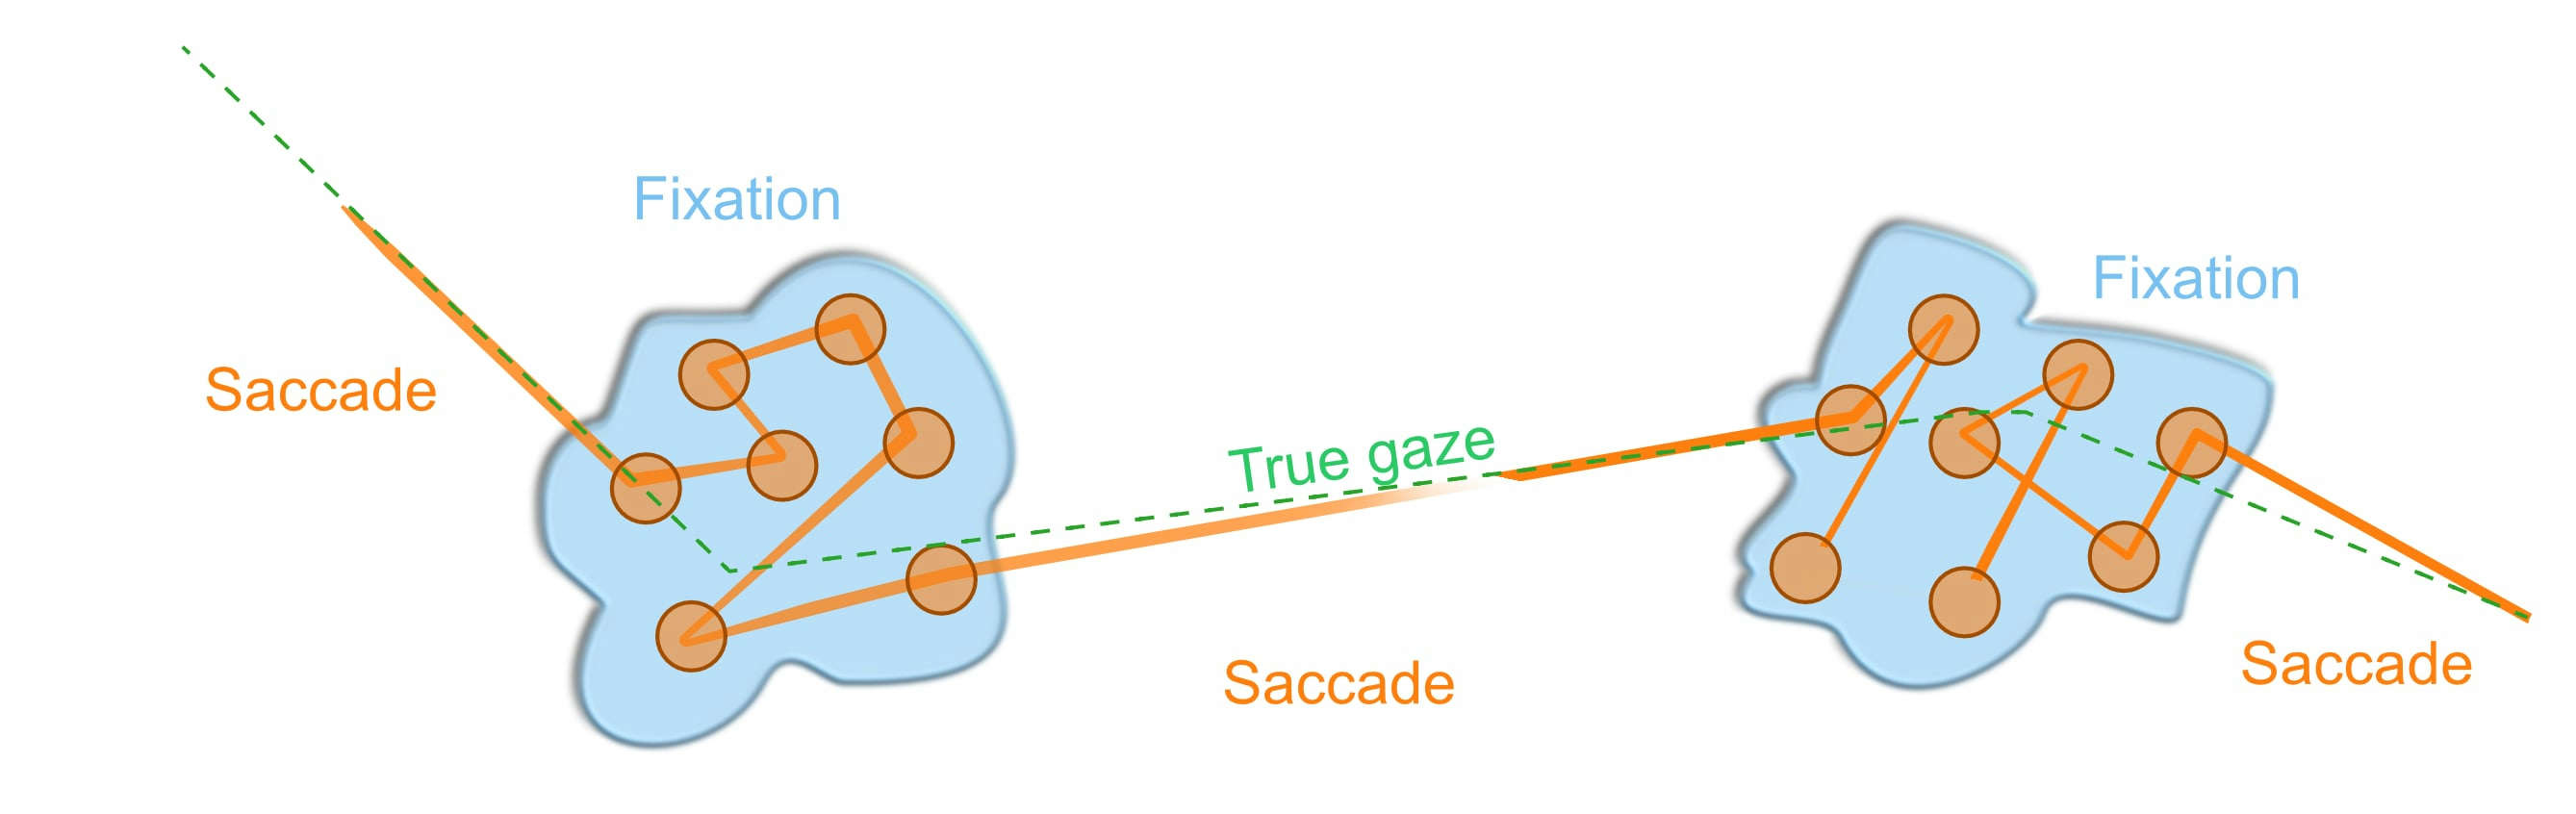

<figcaption class="figure-caption has-text-centered">Figure 1: Fixation and saccades in gaze data.
</figcaption>
</figure>
</div>
The visualizations presented throughout the exercise are based on data collected from `test_subject_3`
 using the `grid`
 pattern.
The exercise contains functions in the `filtering_util.py`
 file to create plots. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#task_load_data">Task 1: Load the data</a>
            </li>
            <li>
            <a href="#task_gauss1">Task 2: Gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss2">Task 3: Implementing gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss3">Task 4: Reflect on applying gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss4">Task 5: Partial derivatives</a>
            </li>
            <li>
            <a href="#partial1">Task 6: Calculate the derivatives</a>
            </li>
            <li>
            <a href="#partial2">Task 7: Derivatives of a signal</a>
            </li>
            <li>
            <a href="#partial3">Task 8: Saccade detection</a>
            </li>
            <li>
            <a href="#partial4">Task 9: Saccade detection</a>
            </li>
            <li>
            <a href="#fixations1">Task 10: Fixation detection</a>
            </li>
            <li>
            <a href="#fixations2">Task 11: Visualization of signals</a>
            </li>
            <li>
            <a href="#fixation3">Task 12: Noise handling during fixations</a>
            </li>
            <li>
            <a href="#fixation4">Task 13: Frame grouping</a>
            </li>
            <li>
            <a href="#results1">Task 14: Analyse results</a>
            </li>
            <li>
            <a href="#results2">Task 15: Reflect</a>
            </li>
            <li>
            <a href="#owndata">Task 16: Combined signal</a>
            </li>
            <li>
            <a href="#combined1">Task 17: Combined signal</a>
            </li>
            <li>
            <a href="#combined2">Task 18: Reflect</a>
            </li>
        </ul>
    </div>
</article>

**Note:** Although the number of tasks is substantial, each requires minimal programming effort, with many tasks primarily necessitating reflection on the outcomes.


---
**Task 1 (easy): Load the data👩‍💻**
1. Run the cell to visualize the `grid`
 pattern of `test_subject_3`
.
**Note:** The code is loading the data from the folder of week 6. Alternatively you can copy the data to the folder of this exercise and change the file path accordingly.




---

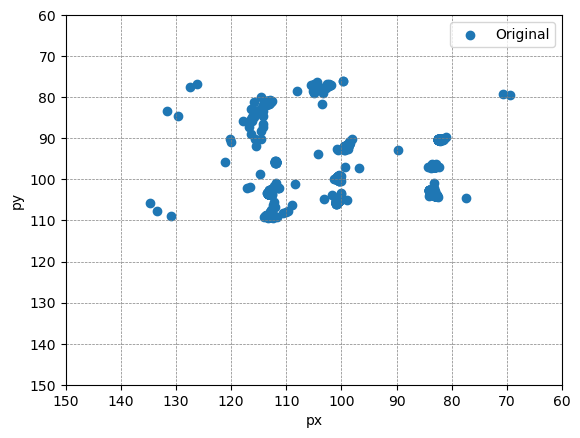

In [803]:
test_subject = 'test_subject_3'

csv_file =f'../W06/data/output/{test_subject}/grid/pupil_coordinates.csv'

pupil_coor= filtering_util.load_csv1(csv_file)

filtering_util.plot_pupil_coor(pupil_coor['px'], pupil_coor['py'], 'Original')
plt.show()

The next task involves visualizing the pupil coordinates signals `px`
 and `py`
 for the gaze `grid`
 pattern. In this task, a $1D$ Gaussian filter will be applied to smooth the signals individually. [Figure 2](#gauss) illustrates the Gaussian $1D$ filters and the corresponding filtered signal. The cell below convolves a Gaussian filter to gaze data. 
<div class="has-text-centered">
<figure class="image is-inline-block" id="gauss">

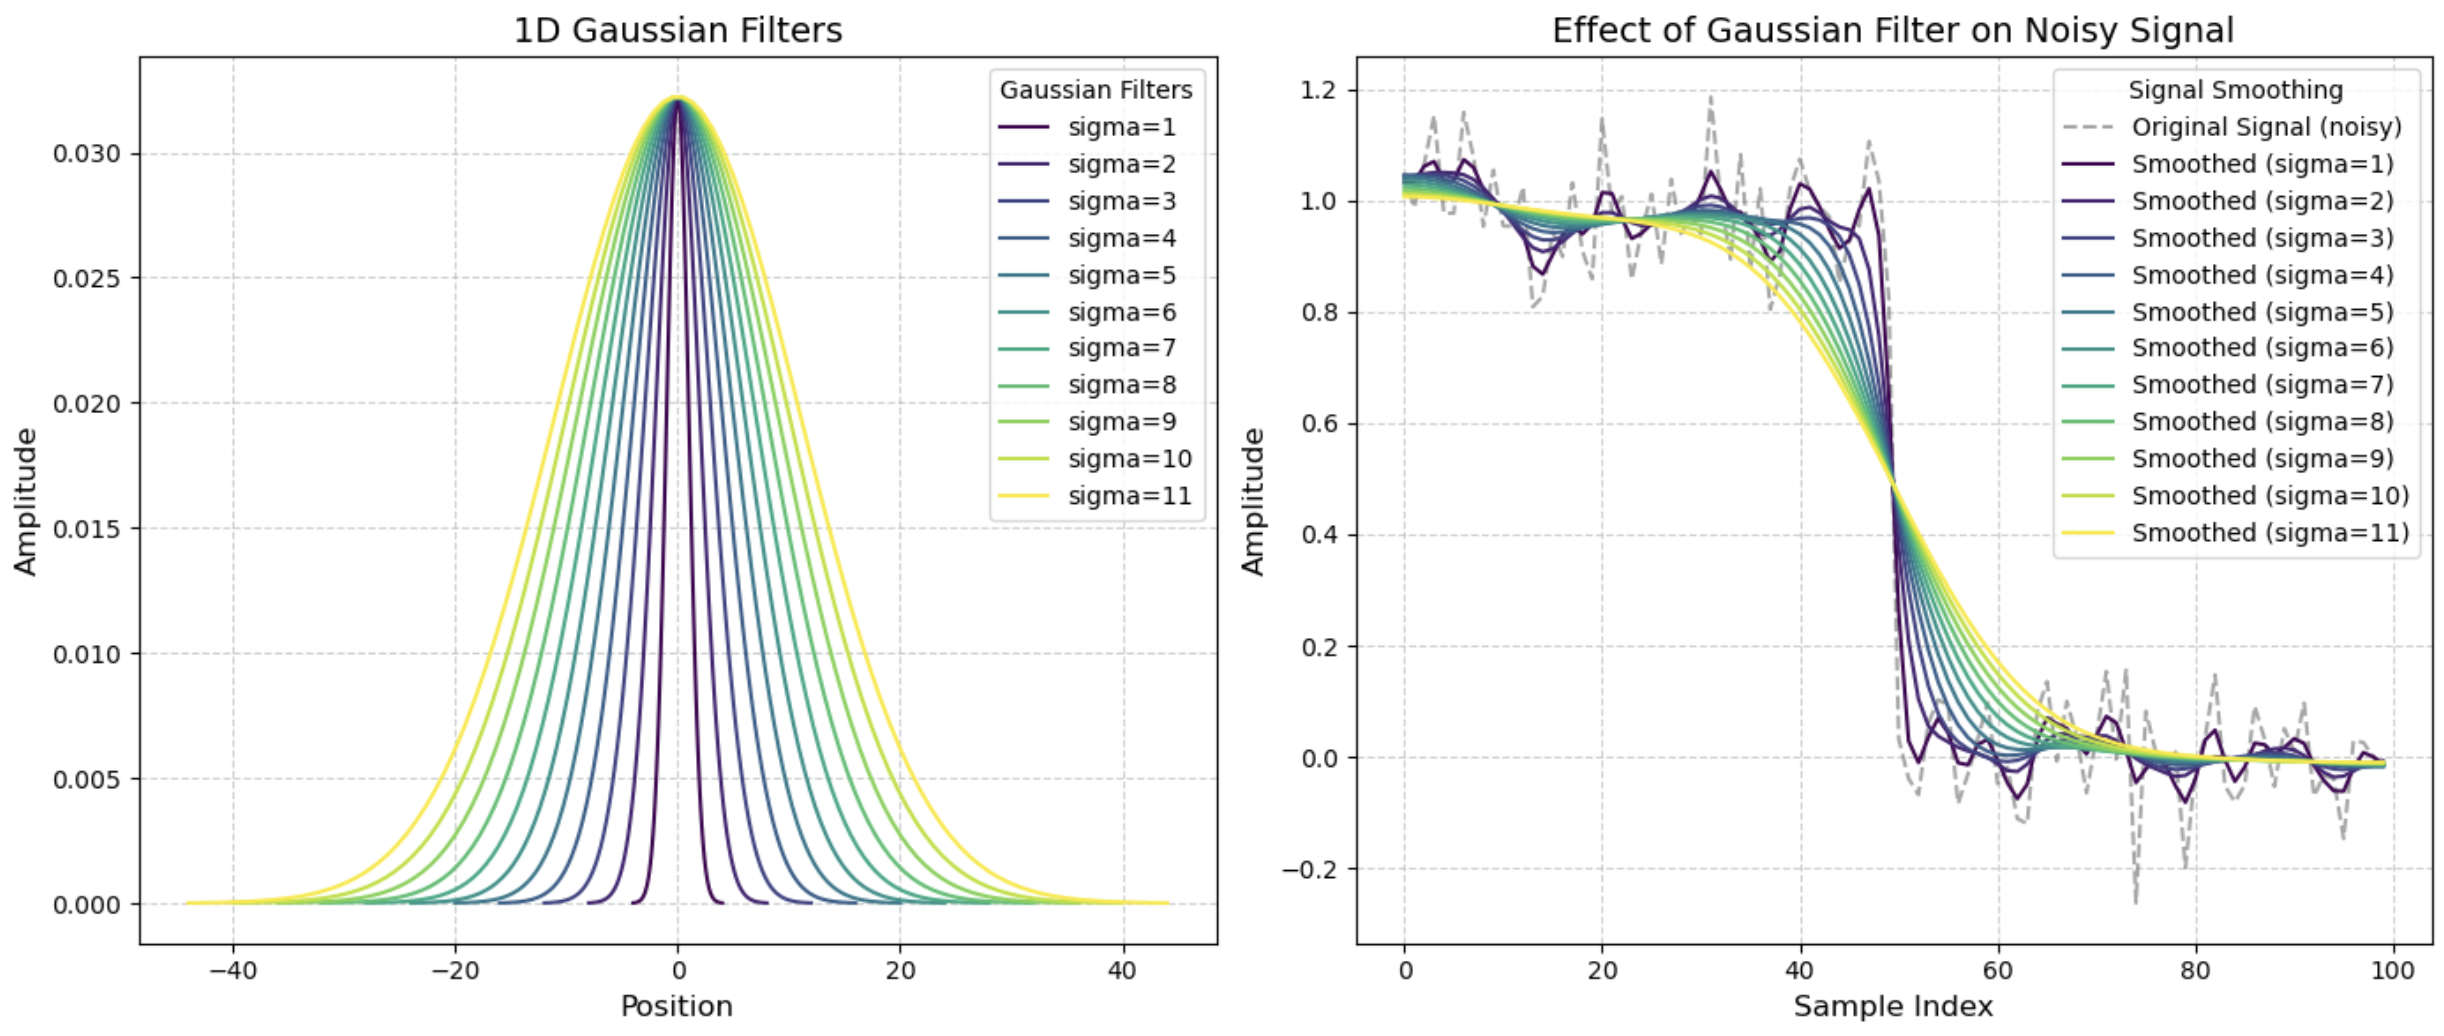

<figcaption class="figure-caption has-text-centered">Figure 2: Left: Shows the shape of the Gaussian filter for each value of sigma. Right: Demonstrates the effect of smoothing the noisy signal with each Gaussian filter.
</figcaption>
</figure>
</div>

---
**Task 2 (easy): Gaussian filter👩‍💻**
1. Reflect on the effect of applying a Gaussian filter to the data and how this can affect the subsequent proccessing of the gaze signal.


---

**Gaussian filter**
Uses convolution with a kernel based on the Gaussian (bell-shaped) function.
This ensures we capture most of the data in the center, and less in the outlier positions, compared to just taking a mean.
This will reduce noise, by smoothing out the data.
But this can also "blur" some of the finer details.

**Smaller sigma**
Less broad smoothing, and therefore has more finer details.

**Larger sigma**
Broader, and therefore blurs the data more, making it much more smooth, but less details.
It’s a trade-off between noise reduction and preserving the accuracy of the gaze pattern

**How it affects gaze signal**
For pupil-tracking applications, the filtered gaze signal will be smoother, 
helping eliminate spurious noise that may affect the precision of gaze estimations, especially over longer durations.
In other words: 
Fixations become closer to the center of the fixations, and thus the gaze point.
Saccades, would if the sigma of the function is too high, blur into the fixation points.
We want a sweetspot, where we remove the noise, but maintain the actual gaze signal


---
**Task 3 (easy): Implementing gaussian filter👩‍💻**
1. Study the function `apply_gauss`
 in the cell below.
2. Apply a Gaussian filter to the gaze data individually for `px`
and `py`
 signals. Use the function `plot_x_and_y`
 from `filtering_util.py`
 to visualize the result.    - The function takes two arrays of data as parameters.




---

UNFILTERED


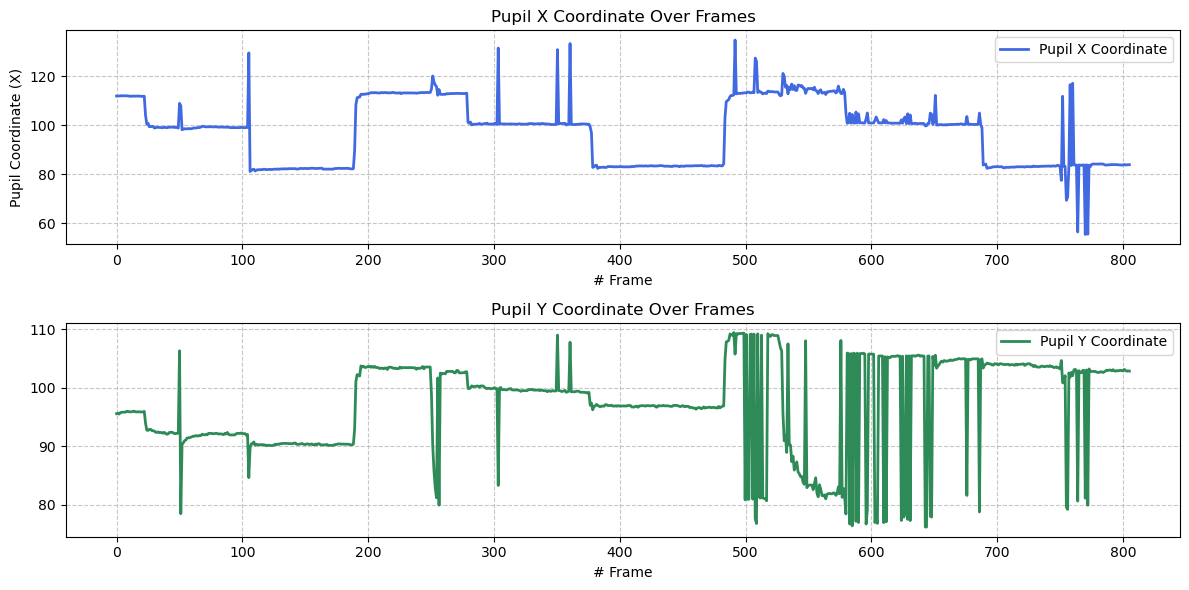

Sigma = 5


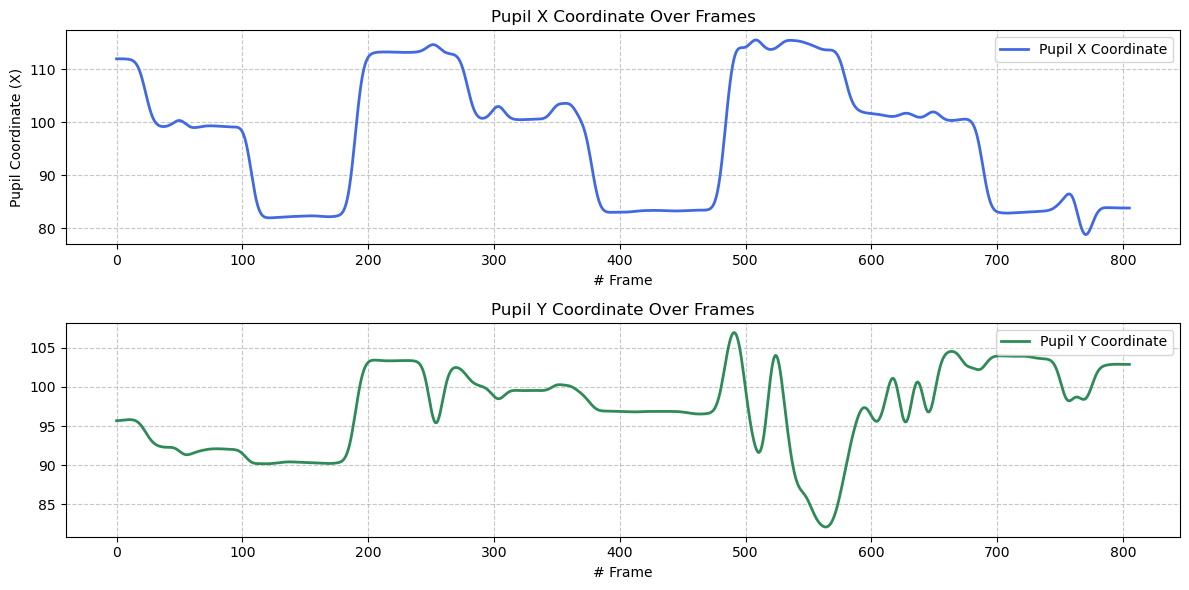

Sigma = 10


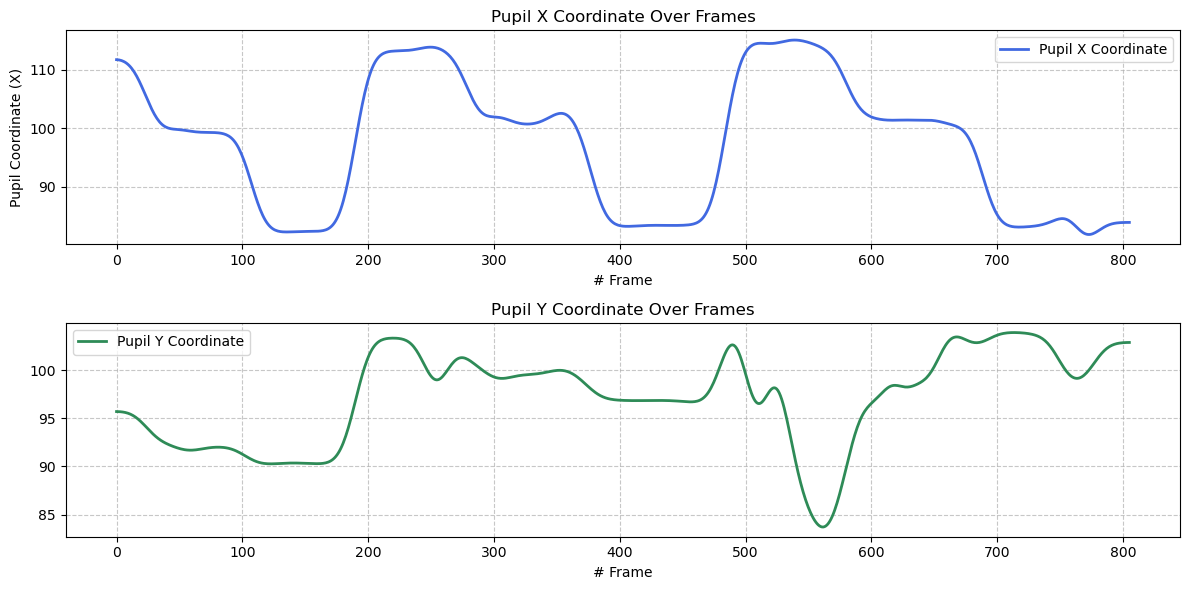

Sigma = 15


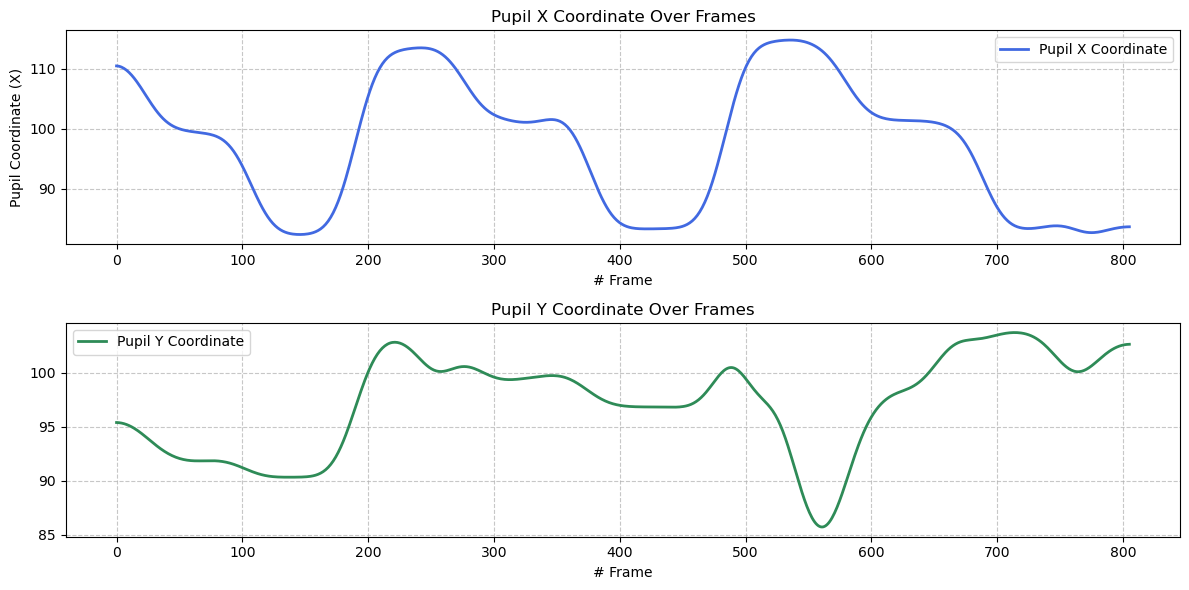

Sigma = 20


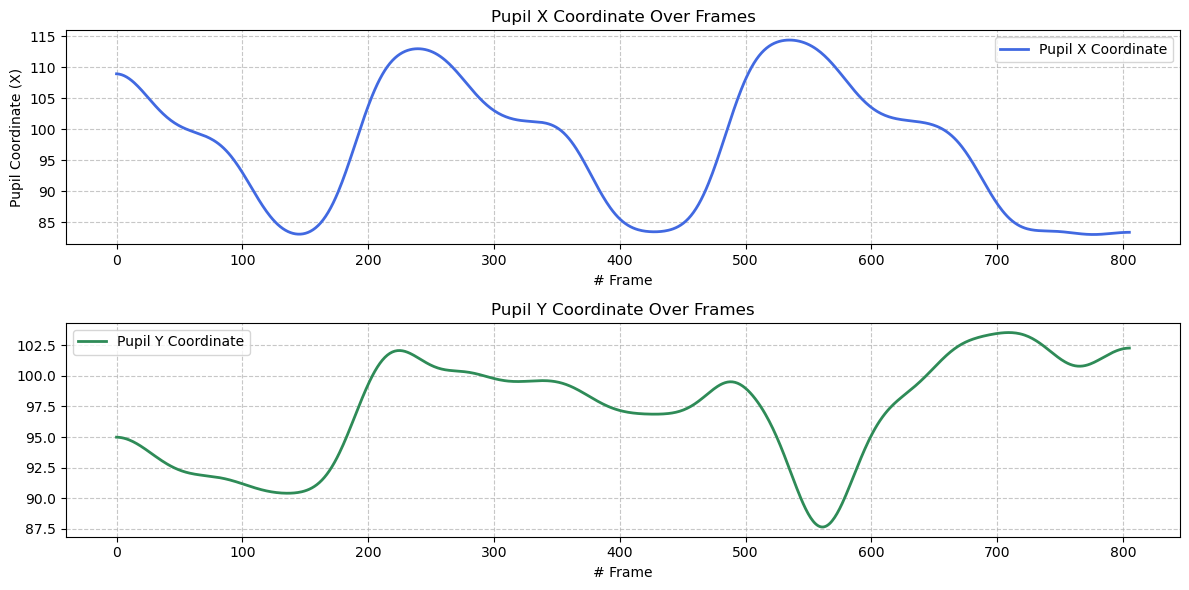

In [804]:
def apply_gauss(data, sigma = 3):
    #We input some 1D signal, like [5,5,7,7,8,9,9,10]
    #Use gaussian filter with some sigma as kernel (filter)
    filtered = gaussian_filter1d(data, sigma=sigma, order = 0)
    #We output some 1D signal like [5,6,7,8,8,9,9,10]
    return filtered

px = np.asarray(pupil_coor['px'])
py = np.asarray(pupil_coor['py'])

#OUR last index shows wrong data! We need to remove it
px = px[:-1]
py = py[:-1]

filtered_x = apply_gauss(px)
filtered_y = apply_gauss(py)

print("UNFILTERED")
filtering_util.plot_x_and_y(px, py)
for i in range(5, 25, 5) :
    print(f"Sigma = {i}")
    filtered_x = apply_gauss(px, sigma=i)
    filtered_y = apply_gauss(py, sigma=i)
    filtering_util.plot_x_and_y(filtered_x, filtered_y)
    
filtered_x = apply_gauss(px, sigma=10)
filtered_y = apply_gauss(py, sigma=5)


---
**Task 4 (easy): Reflect on applying gaussian filter👩‍💻💡**
1. Experiment with the `sigma`
 parameter, which value of sigma removes the noise, but maintains the signal? 
2. For which value of `sigma`
 does the important features of the signal start to disappear?


---

**Good and bad sigma values**
In the unfiltered data we tried to identify the fixations in the signals (for y it was a bit difficult)
![important_features_x](important_features_x.PNG)
![important_features_y](important_features_y.PNG)

When sigma is around 10 the important features of the signal are still visible for x. At 20 the graph becomes too smoothed out to properly detect the gazes.

![smoothed_x](smoothed_x.PNG)

(There are still steep slopes between each fixation)

![too_smoothed_x](too_smoothed_x.PNG)

(We start to lose some of the features on the left side of the data)

The y data seems more noisy and it is harder to tell where the gaze happens in some cases. When sigma is at around 5 the gaze is still visible some places but there remains a lot of noise. However as sigma increases and removes some noise we start to lose the important features of the signal that can detect the gaze fx at sigma = 15.


## Partials derivatives

---
**Task 5 (easy): Partial derivatives💡**
1. Recall from the lecture the partial derivatives of a signal calculated by convolving using the filter `[-1, 1]`
. What would be the result of applying the derivative filter to data smoothed by a Gaussian filter? Use the following questions to guide your answers:    - Why does this filter find the derivative of the signal?
    - Which information is gained by applying such filter to gaze data?
    - How can the output be used for further processing?
    - What is the influence of the `sigma`
 value in the Gaussian the filter when finding the partial derivatives?




---

By getting derivative of the signal, we get a new line, showing where there are most changes (high slopes) in the original signal.

**Why does [-1,1] find the derivative of the signal**

The partial derivative is defined as (f(x+1) - f(x)) / 1. Basically how does the data change as we move one step further.
By applying the [-1, 1] filter, we get a result where each data point n gets a value of -f(n) + f(n+1) which is the partial derivative.


**Which information is gained by applying such filter to gaze data**

It tells us for each data point how different the next data point is (large change in values ie. [3,10]). 
Basically where are there big changes in the data, and where does the data have plateaus (non-changing values ie [1,1,1...])

**How can the output be used for further processing**

Saccade (where eye is moving from point A to point B)
fixation (where eye is staring at a certain point)

With this information we can tell where there is eye movement (large change in data), indicating a saccade, and where the eyes are still (small or no change in data), indicating fixations.

**What is the influence of the sigma value in the gaussian the filter when finding the partial derivatives**

Small fluctuations in the data caused by noise, are flattened out because the gaussian average will use the surrounding data points to drag it close towards the surrounding data. We want to remove these fluctuations because they will cause the partial derivatives to detect big data changes which could indicate a false gaze which in reality was just caused by some shaking or other noise. 
In short, greater sigma values cause less fluctuation and smaller values for the partial derivatives.

The following task is about implementing a method to find derivatives a signal using the filter $[-1, 1]$. 
The function `plot_x_and_y_complete`
 from `filter_util.py`
 takes two dictionaries one for each coordinates and plots the signals. The dictionaries should contain keys value pairs of the original and processed signal. 

---
**Task 6 (easy): Calculate the derivatives👩‍💻**
1. Complete the function `get_partial_derivatives`
 to apply the derivative filter to a signal and return the absolute value of the result. Use [np.convolve](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html)
 for convolution. The **absolute value** of the derivative is used as only the rate of change is of interest. 


---

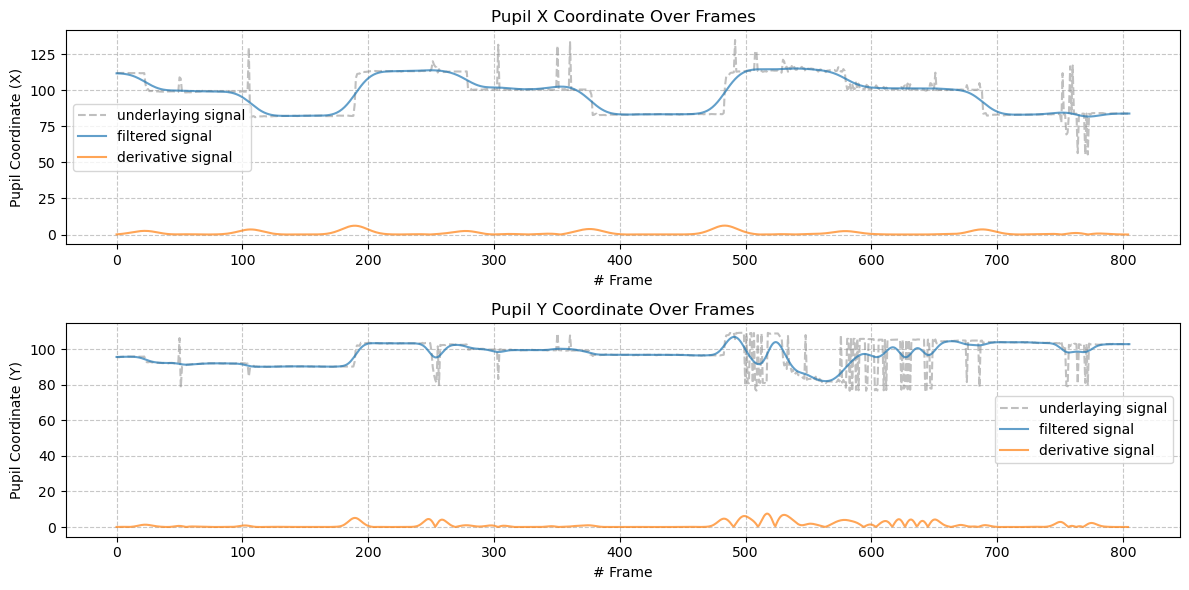

In [805]:
def get_partial_derivatives(data):
    """
    Convolve 1D data with a [-1, 1] filter.

    Args:
        data (numpy array): 1D array of data.

    Returns:
        numpy array: Convolved result.
    """
    # Convolving the data with the filter [-1, 1] for partial derivatives
    return np.abs(np.convolve(data, [-1, 1], mode='valid'))

der_x = get_partial_derivatives(filtered_x)
der_y = get_partial_derivatives(filtered_y)

x_collected = {'underlaying': px, 'filtered': filtered_x, 'derivative': der_x}
y_collected = {'underlaying': py, 'filtered': filtered_y, 'derivative': der_y}

filtering_util.plot_x_and_y_complete(x_collected, y_collected)


---
**Task 7 (easy): Derivatives of a signal💡**
1. Inspect the plots above and reflect on the relation between the original signals, the filtered and the derivative of the filtered signals. In your reflections you may include:    - What charateristics in the gaze data do the peaks and plateaus encapsulate, use the data collection session to elaborate. 
    - What behaviour is expected for the `x`
 coordinate of the pupil?
    - What behaviour is expected for the `y`
 coordinate of the pupil?
    - What would happen with these if if the pattern was changed?




---


**What do peaks encapsulate for derivative of the filtered signal:**

High change in value. Such as moving from point A to point B, ie. **saccade**

**What do plateus encapsulate for derivative of the filtered signal:**

No change in value. Such as looking at the same point for 2 seconds / 100 frames, ie. **fixation**.

**What is expected for the x and y coordinate of the pupil:**
For the derivative data, we expect 9 platues, indicating eye gazing at 9 points, and with a saccade between each, indicating moving to another point.
For the original data, this will be more noisy, and the platues and peaks might not be as visibly outstanding.
This should be much more clear on the filtered data, which should have reduced the noise.

**What would happen with these if the pattern was changed?**

We assume pattern = Grid, line, circle.
We expect a platue for each point.
But for example for line, we don't expect saccade for the y-coordinate, only the x-coordinate.


The following task are about detecting events (fixations and saccades) in eye signals using derivative filters.

---
**Task 8 (easy): Saccade detection👩‍💻**
1. Complete the function `saccade_detection`
.     - The function should identify indices for large eye movement changes called _saccades_ using the derivatives of the smoothed signal.


2. Use the function `saccade_detection`
 to detect events in the derivative signal of the filtered signal of both `px`
 and `py`



---

In [806]:
def saccade_detection(derivative_data):
    """
    Detects saccades (non-zero changes) in the derivative data.

    Parameters:
    der (1 x N numpy array): Representing the derivative of the signal.

    Returns:
    saccades (list): A list of indices where there are non-zero changes (saccades).
    """
    saccades = []
    threshold = 0.4  # Fixed threshold for detecting significant changes

    # Loop through the derivative values and detect significant changes
    for idx, value in enumerate(derivative_data):
        if abs(value) > threshold:
            saccades.append(idx)
    
    return saccades

# Detect saccades in the derivative data for x and y
x_saccades = saccade_detection(der_x)
y_saccades = saccade_detection(der_y)



---
**Task 9 (easy): Saccade detection👩‍💻**
1. Run the cell below to visualize the detected saccades.


---

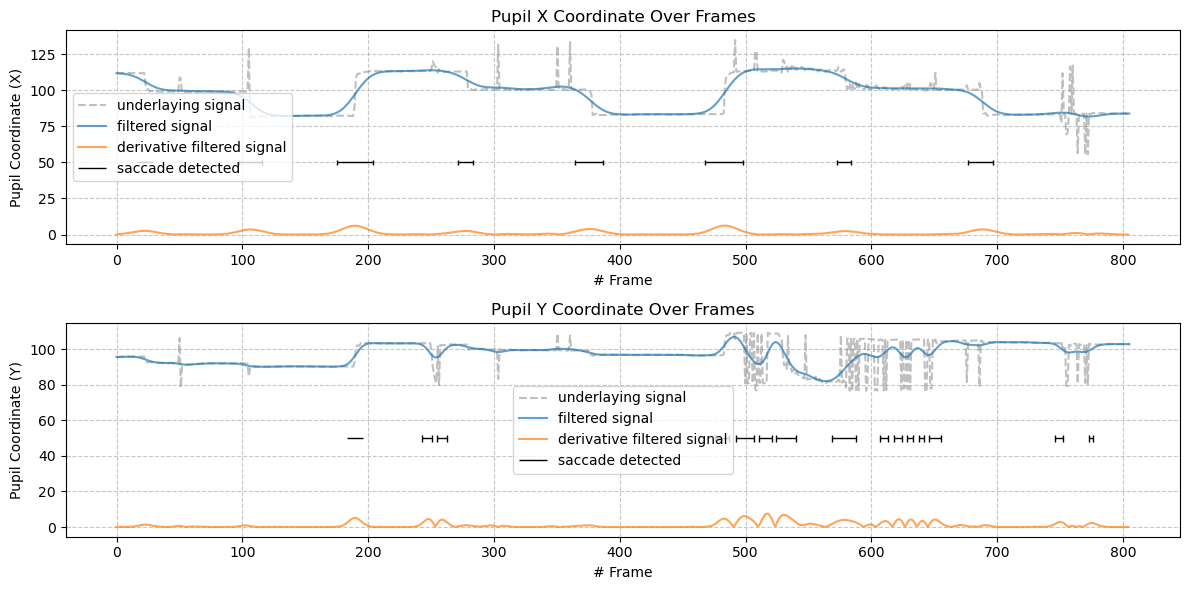

In [807]:
x_saccade = {'underlaying': px, 'filtered': filtered_x, 'derivative filtered': der_x, 'saccade': x_saccades}
y_saccade = {'underlaying': py, 'filtered': filtered_y, 'derivative filtered': der_y, 'saccade': y_saccades}

filtering_util.plot_x_and_y_complete(x_saccade, y_saccade)


---
**Task 10 (easy): Fixation detection👩‍💻**
1. Complete the function `fixation_filtering`
 to handle noise during fixations. Select an appropriate method discussed in the lectures or draw inspiration from the experimental setup to handle noise during fixations.
2. Use the function `fixation_filtering`
 to remove the noise in the filtered signals and return cleaned signals for both `px`
 and `py`
 . 
3. Use the function `get_partial_derivatives`
 to calculate the partial derivatives of the cleaned signals.
4. Use the function `saccade_detection`
 to detect events in the derivative signal of the cleaned signal of both `px`
 and `py`
.


---

In [808]:
def fixation_filtering(px, py, x_saccades, y_saccades):
    """
    Removes noise from the input data based on detected saccades. If a spike is detected
    at a given index, the previous valid value is used to replace the current value.

    Parameters:
        px (1 x N numpy array): Representing the x coordinates (input signal).
        py (1 x N numpy array): Representing the y coordinates (input signal).
        x_saccades (list): A list of indices where saccades are detected in the x direction.
        y_saccades (list): A list of indices where saccades are detected in the y direction.

    Returns:
        px_cleaned (list): A list of the cleaned x coordinates.
        py_cleaned (list): A list of the cleaned y coordinates.
    """
    # Initialize the cleaned lists with the first value (no saccade at index 0)
    px_cleaned = []
    py_cleaned = []
    
    current_fixation_x = []
    current_fixation_y = []
    
    x_smoother = [1/16, 4/16, 6/16, 4/16, 1/16]
    y_smoother = [0, 0, 1, 0, 0]
    
    
    # Loop through the remaining elements of px and py
    for i in range(len(px)):
        # For x values: replace with previous value if it's a saccade, otherwise keep the current value
        if i in x_saccades: # end of fixation
            if current_fixation_x :
                m = np.convolve(current_fixation_x, x_smoother, mode='valid')
                px_cleaned.extend(m)
                current_fixation_x.clear()
            px_cleaned.append(px_cleaned[-1])  # Repeat last valid value
               
        else:
            current_fixation_x.append(px[i])
        
        # For y values: replace with previous value if it's a saccade, otherwise keep the current value
        if i in y_saccades:
            if current_fixation_y :
                m = np.convolve(current_fixation_y, y_smoother, mode='valid')
                py_cleaned.extend(m)
                current_fixation_y.clear()
            py_cleaned.append(py_cleaned[-1])  # Repeat last valid value
                
        else:
            current_fixation_y.append(py[i])
            
    if current_fixation_x :
        m = np.convolve(current_fixation_x, x_smoother, mode='valid')
        px_cleaned.extend(m)
    if current_fixation_y :
        m = np.convolve(current_fixation_y, y_smoother, mode='valid')
        py_cleaned.extend(m)
        
    # Return the cleaned arrays
    return px_cleaned, py_cleaned

# Applying fixation filtering on px and py data based on saccades
cleaned_px, cleaned_py = fixation_filtering(px, py, x_saccades, y_saccades)

# Recalculate derivatives after filtering
der_x_cleaned = get_partial_derivatives(cleaned_px)
der_y_cleaned = get_partial_derivatives(cleaned_py)

# Detect saccades again on the cleaned data
x_saccades_cleaned = saccade_detection(der_x_cleaned)
y_saccades_cleaned = saccade_detection(der_y_cleaned)


---
**Task 11 (easy): Visualization of signals👩‍💻**
1. Run the cell below to visualize the fixations and saccades.


---

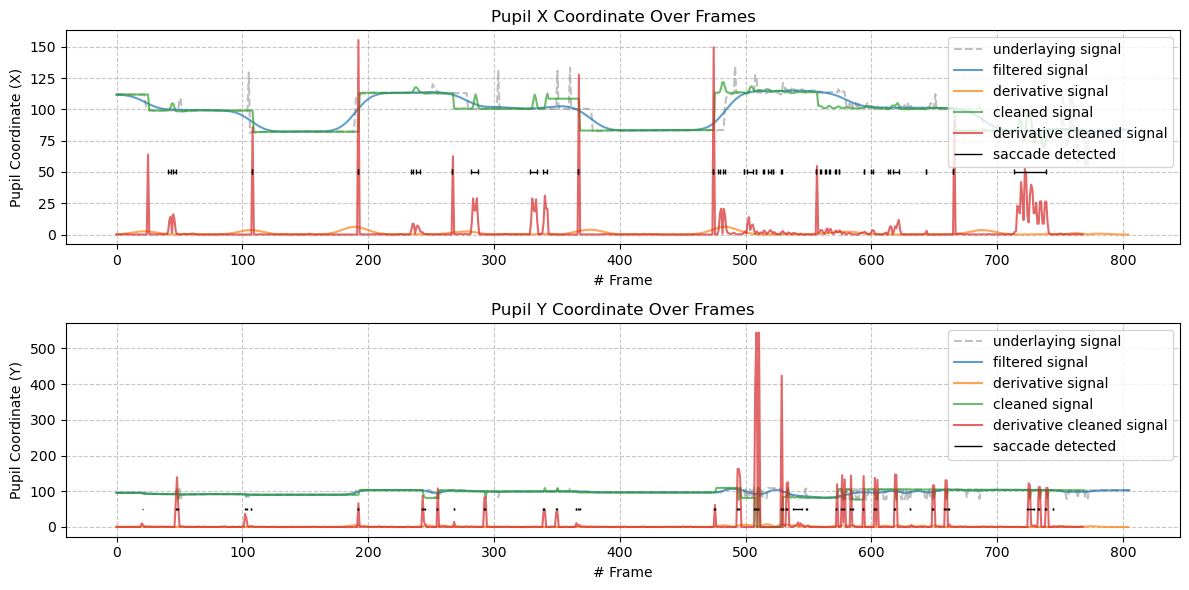

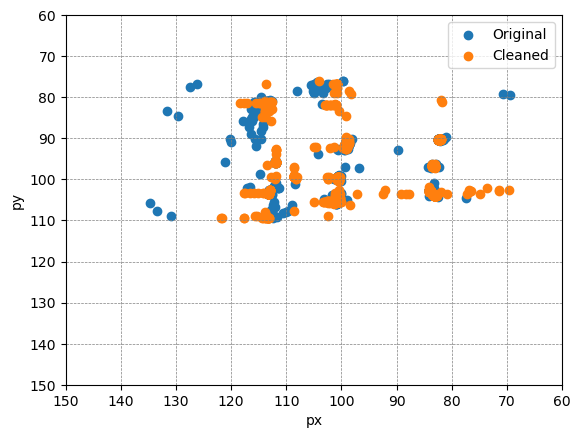

In [809]:
x_collected['cleaned'] = cleaned_px
y_collected['cleaned'] = cleaned_py

x_collected['derivative cleaned'] = der_x_cleaned
y_collected['derivative cleaned'] = der_y_cleaned

x_collected['saccade detected'] = x_saccades_cleaned
y_collected['saccade detected'] = y_saccades_cleaned

filtering_util.plot_x_and_y_complete(x_collected, y_collected, 5) #5 is a scaling factor on the values of the derivative for display purposes
filtering_util.plot_pupil_coor(px, py, 'Original')
filtering_util.plot_pupil_coor(cleaned_px, cleaned_py, 'Cleaned')
plt.show()


---
**Task 12 (easy): Noise handling during fixations💡**
1. Reflect on the assumptions of your method for handling noise during fixations in [Task 10](#fixations1). What are the advantages and limitations of your approach if any?
2. Reflect on other strategies that you could use for handling the noise and outliers in the gaze data.


---

**Assumptions of our method handling noise during fixations. Advantages/limitations of the approach**
We assume that the points in each fixation don't have any great outliers. Then we simply use the gaussian average filter on all points between each saccade. If the points do have great outliers the average will be shifted. We tried for the y-coordinates as well but the noise caused the data to be too spread out towards outliers.

**Strategies we could use for handling noise and outliers in gaze data**
* *_Average filter_*: This would be heavily affected by outliers. Where gaussian filter, prefers to take data in the center.
* *_Media filter_*: Median is a non-linear filter – cannot be done with convolution/correlation. So it kinda tries to smooth the signal, but retain the edges! - because it is kinda robust against outliers.


The next step is to utilize the charateristics of the derivative of the smoothed signal to detect the frames (pupil coordinates) corresponding to each screen calibration point, so the data can be sorted in corresponding input and label pairs.

---
**Task 13 (easy): Frame grouping👩‍💻**
1. Complete the function `get_frames_pupil_movement`
. The function should:    - Construct a dictionary where the keys represent the calibration point numbers (e.g., '0', '1', ..., '8'), and the associated values are tuples consisting of the start and end frame numbers.


2. Use the function `get_frames_pupil_movement`
 to determine the sections pupil corrdinate sections belonging to each calibration coordinate.


---

{'point_0': (0, 25), 'point_1': (26, 108), 'point_2': (109, 192), 'point_3': (193, 267), 'point_4': (268, 367), 'point_5': (368, 474), 'point_6': (475, 556), 'point_7': (557, 665), 'point_8': (666, 721)}


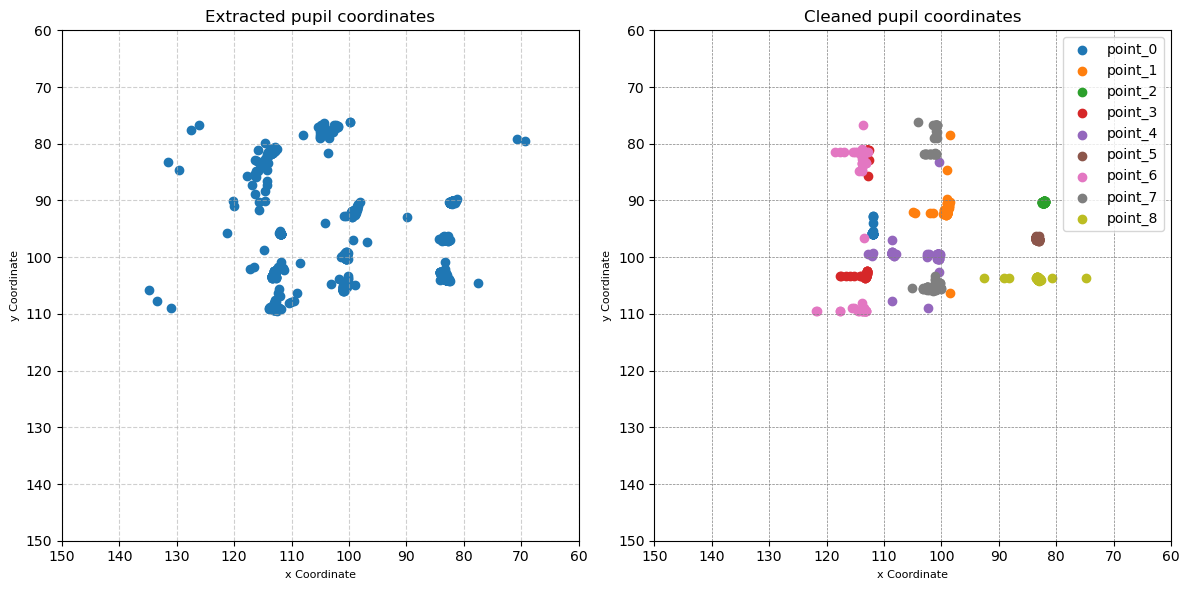

In [810]:
def get_frames_pupil_movement(cleaned_der, cleaned):
    """
    Identifies segments of pupil movement based on changes in the cleaned derivative.

    Parameters:
        cleaned_der (list or numpy array): A 1D array of the derivative values of the cleaned data, indicating changes in pupil position over time.
        data (list or numpy array): The original data corresponding to the pupil movement.

    Returns:
        dict ( {string: tuple(int, int)} ): A dictionary where the keys are calibration point numbers (as strings) and the values are tuples
              containing the start and end frame numbers for each segment.
    """
    
    saccades = saccade_detection(cleaned_der)
    frames = {}
    movement_detected = False
    start_frame = 0
    threshold = 10  
    # Iterate through the cleaned derivative to detect changes
    for i in range(len(cleaned)):
        movement = i in saccades and cleaned_der[i] > threshold
        if not movement and movement_detected :
            # Start of a new fixation
            start_frame = i
            movement_detected = False
        elif movement and not movement_detected:
            # End of the fixation
            end_frame = i
            calibration_point = f"point_{len(frames)}"  # Create a calibration point key
            frames[calibration_point] = (start_frame, end_frame)  # Store the segment
            movement_detected = True

    # If movement was detected but the loop ends without detecting the end, add the last movement
    if movement_detected:
        calibration_point = f"point_{len(frames)}"
        frames[calibration_point] = (start_frame, len(cleaned_der) - 1)

    return frames

# Example usage
frames = get_frames_pupil_movement(der_x_cleaned, cleaned_px)
print(frames)
# Plotting the pupil coordinates with the movement frames
filtering_util.plot_pupil_coordinates(frames, px, py, cleaned_px, cleaned_py)

## Analyzing results
In the following tasks the results of the filtering will be analyzed using _mean_, _variance_ and _covariance_ at each calibration target for both raw data and filtered data.

---
**Task 14 (easy): Analyse results👩‍💻**
1. Run the cell below to visualize the mean, variance and covariance of the data before and after processing.


---

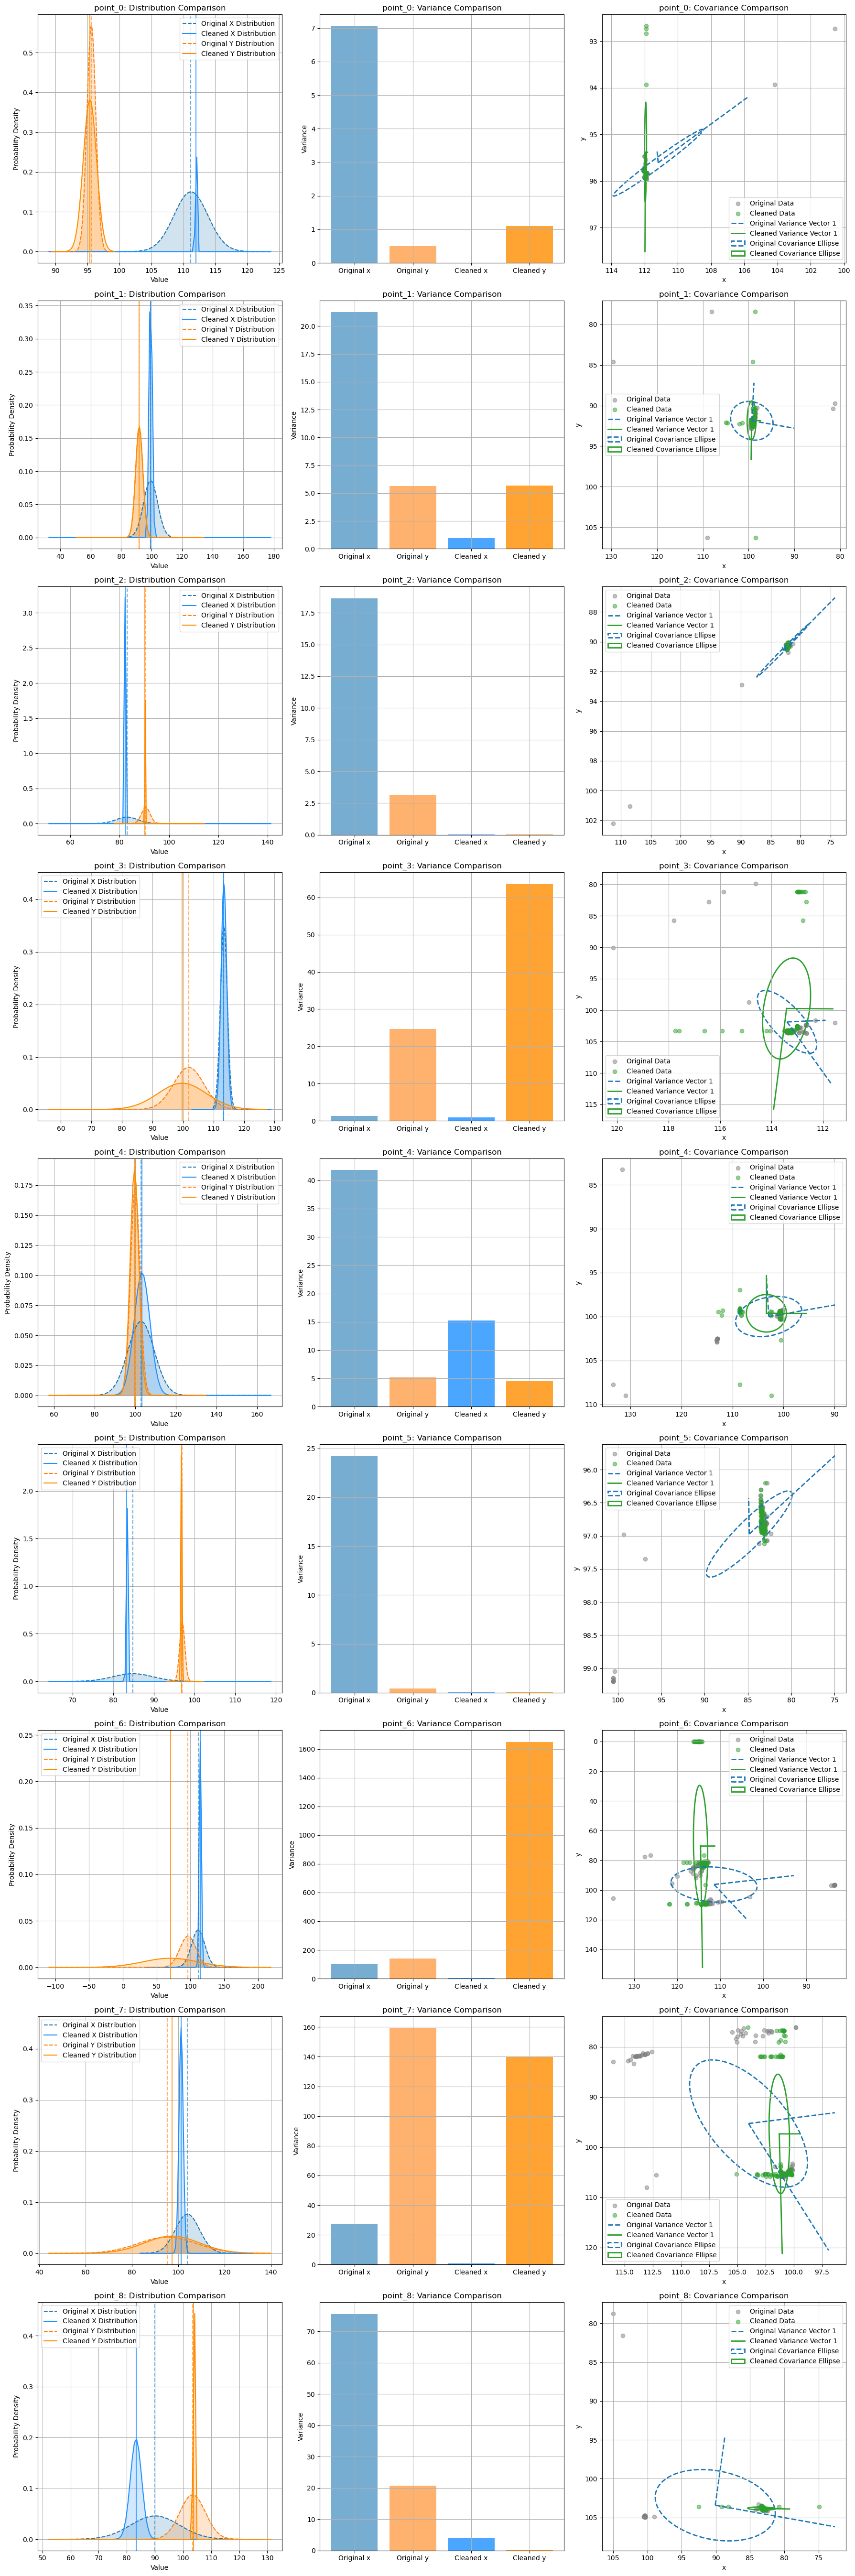

In [811]:
filtering_util.plot_statistics_comparison(px, py, cleaned_px, cleaned_py, frames)


---
**Task 15 (easy): Reflect💡**
1. Reflect on the results visualized in the plots.    - What effect does cleaning the data have on the mean and variance?         - Use your reflection from [Task 12](#fixation3) and reevaluate your choice of strategy, has it changes the underlaying signal in terms of mean and variance? Why? Why not? 


    - If any target points stands out, why? Relate to the experiment setup and the pupil detection method. 



**What effect does cleaning the data have on the mean and variance?**

The variance has been greatly reduced for the x-coordinates. The mean seems slightly shifted for some of the data, while in other cases it stays almost the same. Whether the new means better reflect the underlying ground truth is hard to tell, but optimally we want it to be as close as possible. The decreased variance is positive since it suggests less noisy data, however maybe there are better filtering methods that reduces the variance even further.

**Before and after cleaning: How cleaning the data might have altered the underlying signal in terms of mean and variance. Does it seem like the cleaning process has significantly changed these statistics? Why or why not?**

Since the mean has not changed a great amount the underlying signal should not have been altered greatly.

**If any target points stands out, why?**

Point 3, 6 and 7 have very high variance in the y-coordinates due to the high amount of noise in the data.

The mean for x-coordinates of point 8 seems to have changed significantly. Looking at the graph that shows x-cordinates over frames, it does look like it swings a lot. This noise could be the cause.


---
**Task 16 (medium): Combined signal👩‍💻💡**
1. Go back to [Task 1](#task_load_data) and update the folder path to target the `grid`
 pattern of your own data.
1. Rerun the steps above.
2. Reflect on how well does the method generalizes to this dataset. You may use the following questions to guide your answers?    - How do the results differ from the ones of `test_subject_3`
?
    - Is it possible to reuse the same parameters or do they need to be updated?
    - Has the experimental setup any influence on the methods ability to generalizable? Why/why not?




---

**How well does the method generalizes to our own dataset**

It works almost identically on our data. The y-coordinates could need a smaller sigma value as it got smoothed out too much for the current value and detected very few saccades.

**Has the experimental setup any influence on the methods ability to generalize?**

It depends a lot on the data. The amount of outliers and the way the noise is structured could affect the sigma values that we need, at the way we use filtering.

## Event detection using gradients
In this task you will explore the combined signal (changes in x and y direction simultainously) and use the gradient for event detection. Recall the definition for the gradient of the function $f(x,y)$:

$$

\nabla f(x, y) = \left( \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right)


$$

You will use the gradient magnitude, the length of the gradient defined by:

$$
||\nabla f(x, y)|| = \sqrt{\Big(\frac{\partial f(x,y)}{\partial x}\Big)^2 + \Big(\frac{\partial f(x,y)}{\partial y} \Big)^2}
$$

---
**Task 17 (easy): Combined signal👩‍💻**
1. Complete the functions:    - `gradient_mangitude`
: The function should calculate the gradient magnitude of a $2D$ signal given `x`
 and `y`
.




---

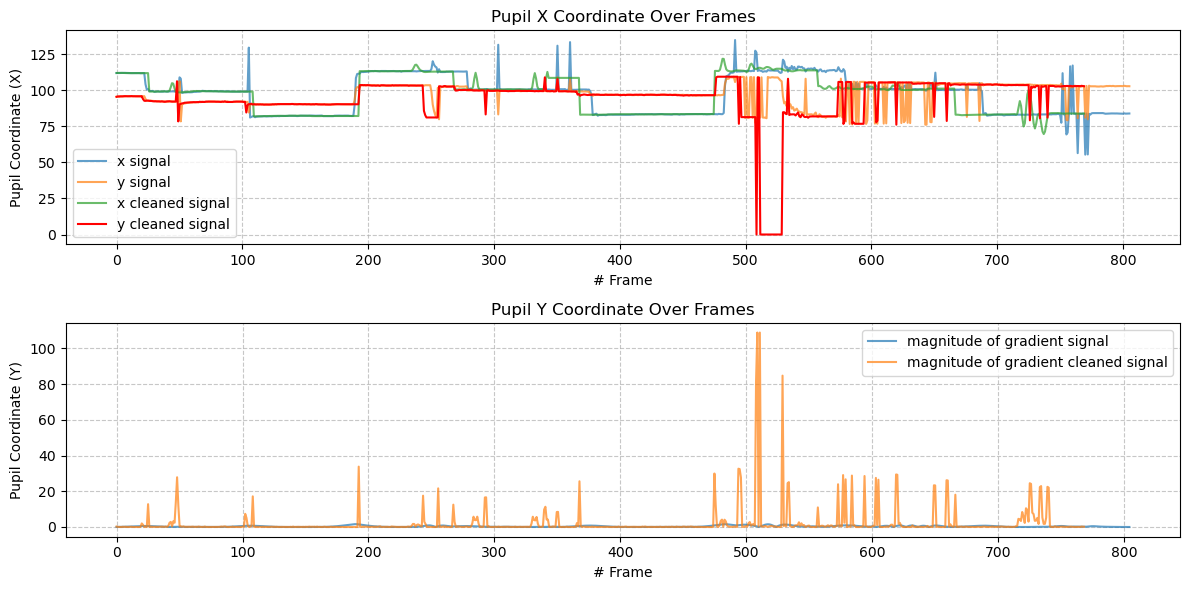

In [813]:
def gradient_mangitude(derivative_x,derivative_y):
    """
    Calculates the gradient mangitude in a 2D space.
    Args:
        x (N x 1 numpy array): Array of x coordinates.
        y (N x 1 numpy array): Array of y coordinates.
    
    Returns:
        (N x 1 numpy array): The Euclidean distance from the origin to the point (x, y).
    """
    return np.sqrt(np.square(derivative_x) + np.square(derivative_y))

magnitude = gradient_mangitude(der_x, der_y)
magnitude_cleaned = gradient_mangitude(der_x_cleaned, der_y_cleaned)

collected_signal = {}
collected_magnitude = {}
collected_signal['x'] = px
collected_signal['y'] = py
collected_signal['x cleaned'] = cleaned_px
collected_signal['y cleaned'] = cleaned_py
collected_magnitude['magnitude of gradient'] = magnitude
collected_magnitude['magnitude of gradient cleaned'] = magnitude_cleaned

filtering_util.plot_x_and_y_complete(collected_signal, collected_magnitude, 5) #5 is a scaling factor on the values of the derivative for display purposes


---
**Task 18 (easy): Reflect💡**
1. Reflect on the benefit of using the combined signal compared to using the two individual signals.


---

**Benefit of using the combined signal compared to using the two individual signals:**

The combined signal gives a more complete overview of where change happens. If both x and y changes at the same time this is magnified which gives a stronger suggestion that the eye has moved. 